In [61]:
""" Dataset: Mall Customer Segmentation Data:
 Este dataset contiene información de clientes de un mall variables incluyen género, ingreso, puntaje de gasto, etc. """

' Dataset: Mall Customer Segmentation Data:\n Este dataset contiene información de clientes de un mall variables incluyen género, ingreso, puntaje de gasto, etc. '

In [80]:
# Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [81]:
# Ingresar la ruta del archivo y cargarlo
file_path = "./Mall_Customers.csv"
data = pd.read_csv(file_path)

# Mostrar las dimensiones del Dataset resultante
print("Dimensiones del Dataset:", data.shape)


Dimensiones del Dataset: (200, 5)


In [82]:
# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Visualizar la estructura y los datos 
data.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [83]:
# Visualización de cada columna
sample_data = data.sample(min(100, len(data))) 
sample_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
76,77,Female,45,54,53
133,134,Female,31,72,71
175,176,Female,30,88,86
195,196,Female,35,120,79
89,90,Female,50,58,46
...,...,...,...,...,...
90,91,Female,68,59,55
135,136,Female,29,73,88
158,159,Male,34,78,1
162,163,Male,19,81,5


In [84]:
# Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Se crea un diccionario para realizar de mejor forma el analisis, colocando los conceptos en español
nombres_en_espanol = {
    
    'CustomerID': 'Identificacion',
    'Gender': 'Genero',
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso_anual',
    'Spending Score (1-100)': 'Puntuacion(1-100)',
}

data.rename(columns=nombres_en_espanol, inplace=True)

In [85]:
# Validar la cantidad de valores nulos
data.isna().sum()

# No hay datos nulos

Identificacion       0
Genero               0
Edad                 0
Ingreso_anual        0
Puntuacion(1-100)    0
dtype: int64

In [86]:
# Identificar las columnas numéricas y validar la cantidad de registros con cero en cada una
for column in data.select_dtypes(include=[np.number]).columns:
    zero_count = (data[column] == 0).sum()
    print(f"Registros con cero en {column}: {zero_count}")

# Podemos ver que ninguna columna tiene valores en cero

Registros con cero en Identificacion: 0
Registros con cero en Edad: 0
Registros con cero en Ingreso_anual: 0
Registros con cero en Puntuacion(1-100): 0


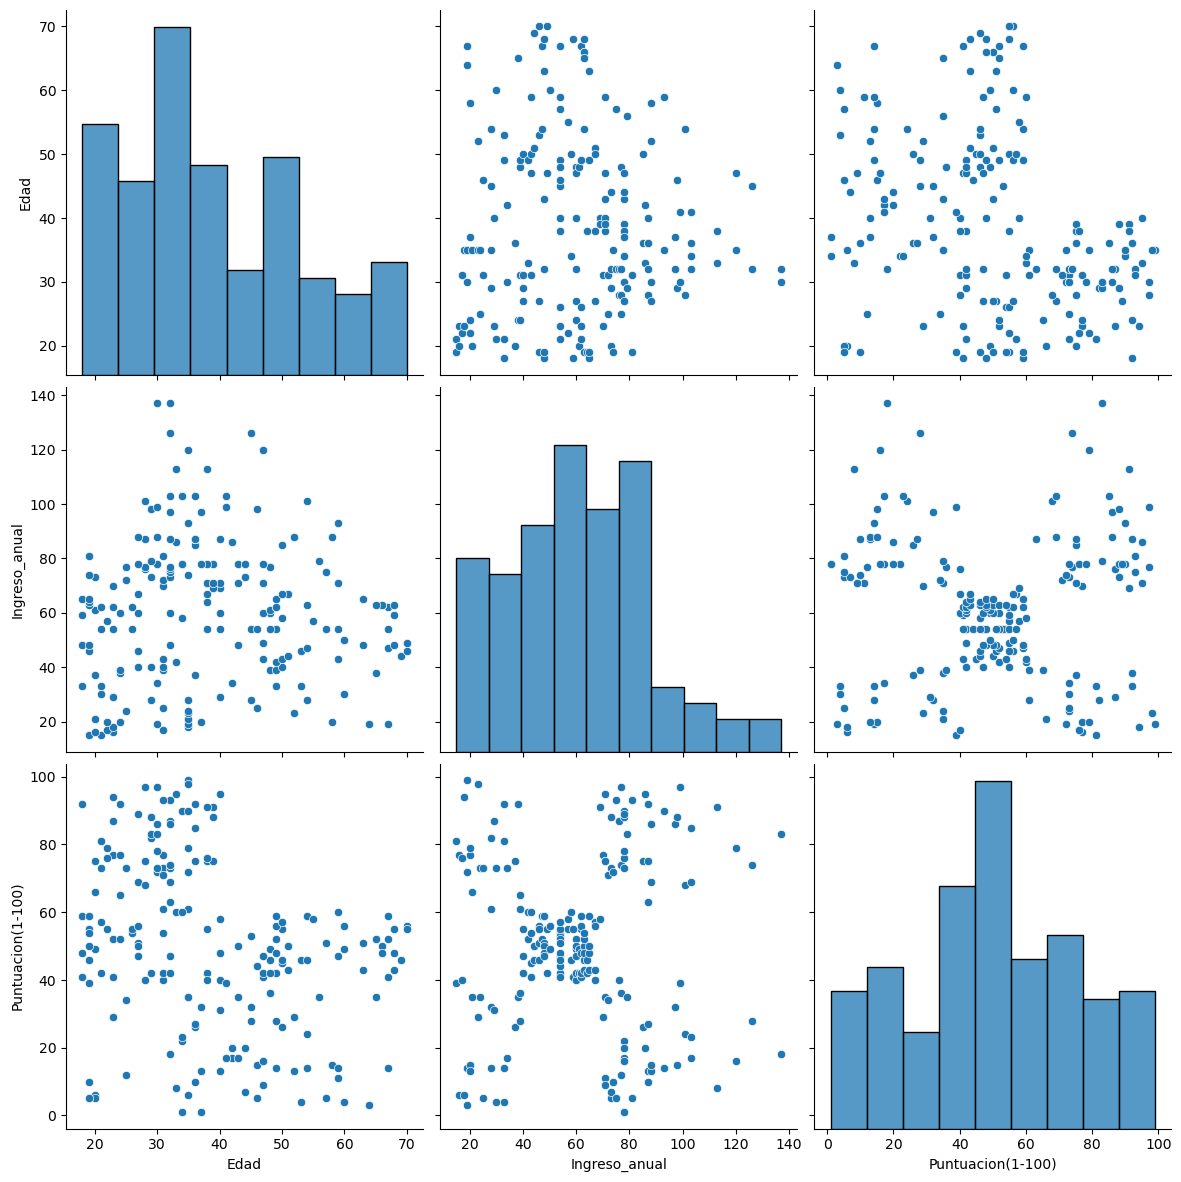

In [87]:
import warnings
warnings.filterwarnings("ignore")

# Graficar columnas deseadas
columnas = ["Edad", "Ingreso_anual", "Puntuacion(1-100)"]

data_seleccionado = data[columnas].dropna()

# Graficar el pairplot con las columnas seleccionadas
sns.pairplot(data_seleccionado, size=4)


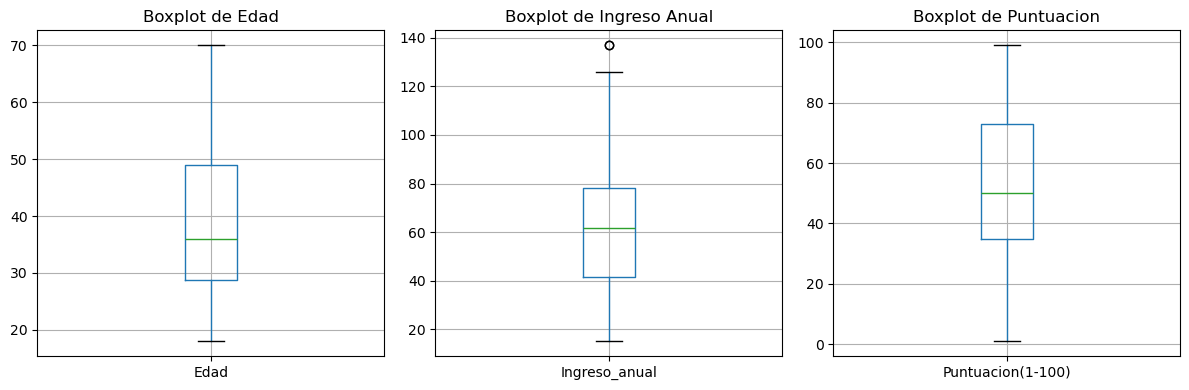

In [88]:
# Gráficos de caja

columns = ['Edad', 'Ingreso_anual', 'Puntuacion(1-100)']
titles = ['Boxplot de Edad', 'Boxplot de Ingreso Anual', 'Boxplot de Puntuacion']

plt.figure(figsize=(12, 4))

# Crear un gráfico de caja para cada columna
for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(1, 3, i)
    data.boxplot(column=column)
    plt.title(title)

plt.tight_layout()
plt.show()


In [89]:
# Identificar los valores atipicos d elas tres columnas numericas

# Definir los niveles mínimos y máximos para cada columna
variables = {
    'Edad': (15, 70),
    'Ingreso_anual': (30, 130),
    'Puntuacion(1-100)': (1, 100)
}

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    total_atipicos = ((data[variable] < nivel_minimo) | (data[variable] > nivel_maximo)).sum()
    print("Datos atípicos de", variable, "es:", total_atipicos)

Datos atípicos de Edad es: 0
Datos atípicos de Ingreso_anual es: 32
Datos atípicos de Puntuacion(1-100) es: 0


In [90]:
# Filtrar los datos atípicos para las tres columnas

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    data = data[(data[variable] < nivel_maximo) & (data[variable] > nivel_minimo)]

In [91]:
# Consultar nuevamente los datos atípicos 

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    total_atipicos = ((data[variable] < nivel_minimo) | (data[variable] > nivel_maximo)).sum()
    print("Datos atípicos de", variable, "es:", total_atipicos)

Datos atípicos de Edad es: 0
Datos atípicos de Ingreso_anual es: 0
Datos atípicos de Puntuacion(1-100) es: 0


In [92]:
# Validar los datos

print(data.describe())

       Identificacion        Edad  Ingreso_anual  Puntuacion(1-100)
count      162.000000  162.000000     162.000000         162.000000
mean       115.586420   39.382716      67.179012          50.845679
std         48.107752   13.671903      20.740306          24.033768
min         33.000000   18.000000      33.000000           4.000000
25%         75.250000   29.000000      54.000000          39.250000
50%        115.500000   38.000000      65.000000          50.000000
75%        155.750000   49.000000      78.000000          68.750000
max        198.000000   69.000000     126.000000          97.000000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 32 to 197
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Identificacion     162 non-null    int64 
 1   Genero             162 non-null    object
 2   Edad               162 non-null    int64 
 3   Ingreso_anual      162 non-null    int64 
 4   Puntuacion(1-100)  162 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.6+ KB


In [94]:
# Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

# Eliminar las columnas que no se van a utilizar: 'Genero' e 'Identificacion'

data.drop(['Genero', 'Identificacion'], axis=1, inplace=True)

In [95]:
# se visualiza que ya no existen estas columnas
data.head()

,Edad,Ingreso_anual,Puntuacion(1-100)
32,53,33,4
33,18,33,92
34,49,33,14
35,21,33,81
36,42,34,17


In [134]:
# Estandarizar los datos antes de aplicar K-Means

scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(data), columns = data.columns)


# MODELO HIERARCHICAL CLUSTERING

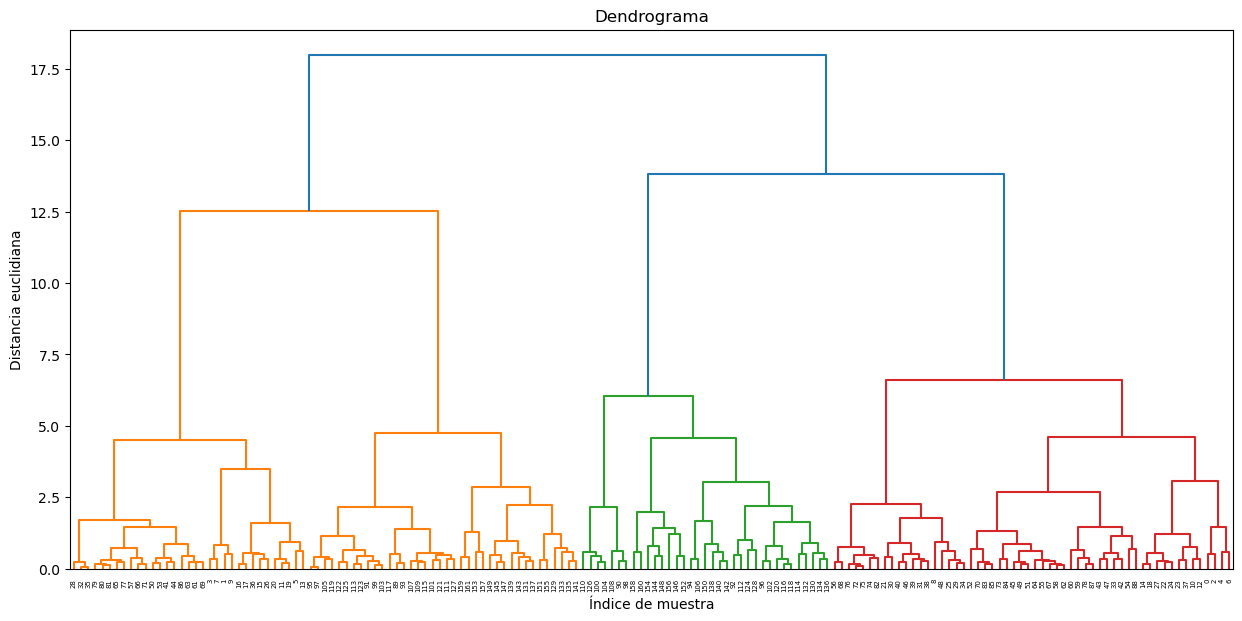

In [162]:
# Dendograma con la estructura jerarquica del agrupamiento de datos

# Calcular la matriz de enlace
Z = linkage(X, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia euclidiana')
plt.show()


In [164]:
def plot_dendrogram(model, **kwargs):
    n_samples = len(model.labels_)
    counts = np.zeros(model.children_.shape[0])
    for i, merge in enumerate(model.children_):
        current_count = sum(counts[child_idx - n_samples] if child_idx >= n_samples else 1 for child_idx in merge)
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, np.arange(model.children_.shape[0]), counts]).astype(float)
    
    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Distancia euclidiana')
    plt.show()


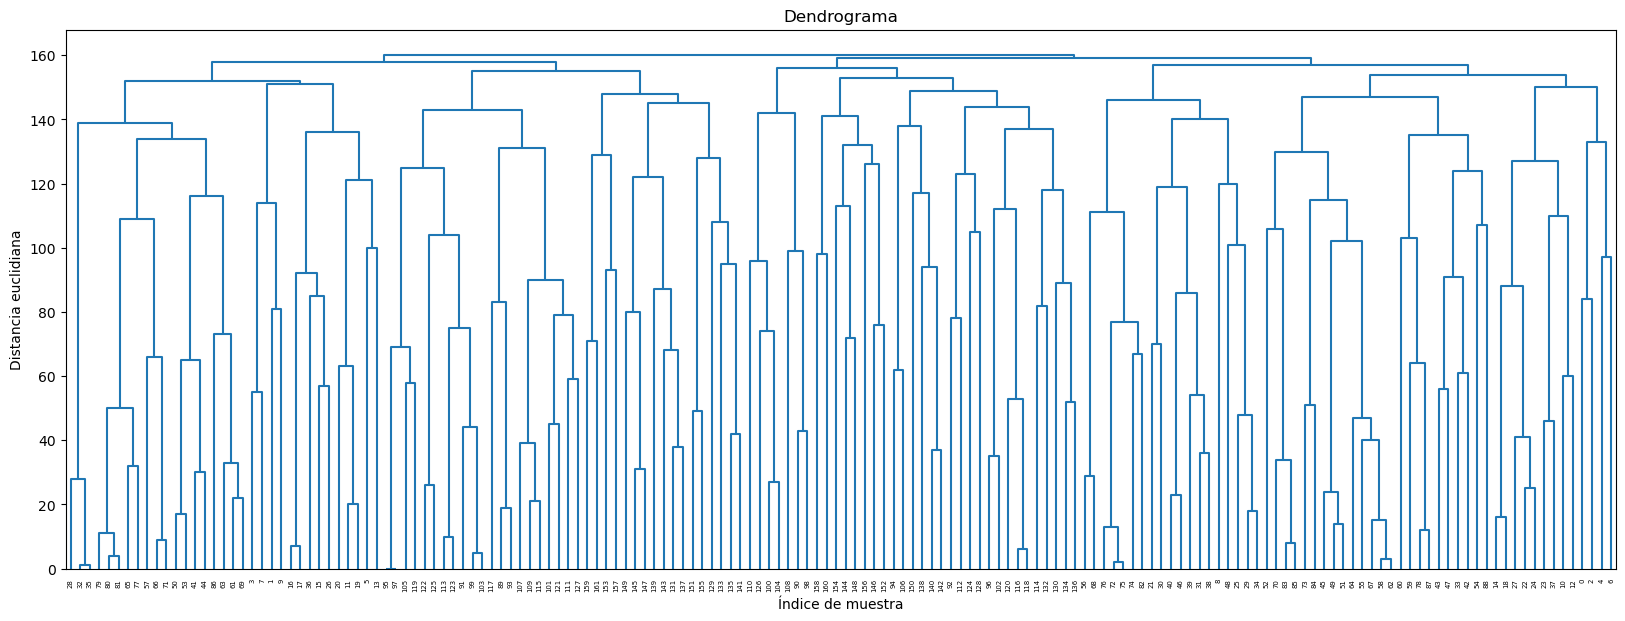

In [165]:
plot_dendrogram(hier_clustering, color_threshold=0)

In [166]:
# Clustering jerárquico

hier_clustering = AgglomerativeClustering(n_clusters=3)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0])

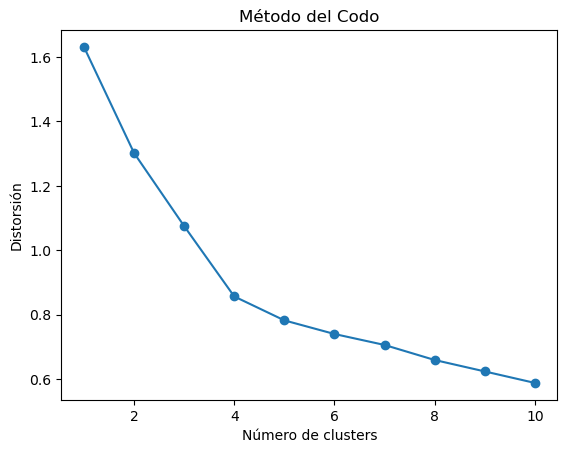

In [167]:
# Gráfico de codo

def plot_elbow(X, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de clusters')
    plt.ylabel('Distorsión')
    plt.show()

# Llamar a la función con tus datos
plot_elbow(X)


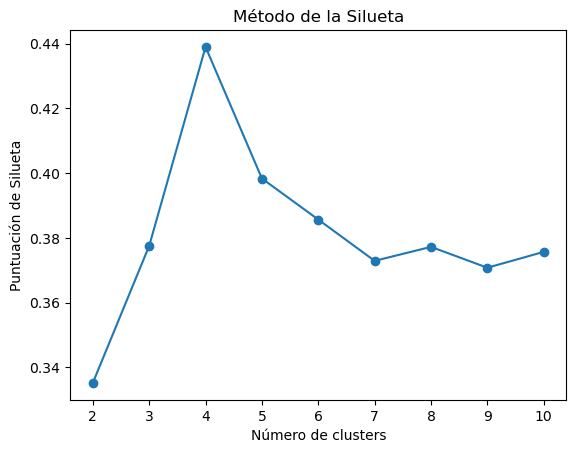

In [168]:
# Gráfico Silhouette Score

def plot_silhouette(X, max_clusters=10):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
        
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Método de la Silueta')
    plt.xlabel('Número de clusters')
    plt.ylabel('Puntuación de Silueta')
    plt.show()

# Llamar a la función con tus datos
plot_silhouette(X)


In [169]:
# Medidas de calidad para Clustering Jerárquico

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def cluster_quality(X, labels):
    silhouette = silhouette_score(X, labels_hier)
    calinski = calinski_harabasz_score(X, labels_hier)
    davies = davies_bouldin_score(X, labels_hier)
    
    print(f"Coeficiente de Silueta: {silhouette}")
    print(f"Calinski-Harabasz Index: {calinski}")
    print(f"Davies-Bouldin Index: {davies}")

cluster_quality(X, labels_hier)


Coeficiente de Silueta: 0.3682282467444023
Calinski-Harabasz Index: 89.12107986634129
Davies-Bouldin Index: 0.9818803754390855


In [170]:
Z = linkage(X, method='ward', metric='euclidean')

original_distances = pdist(X)

# Calcular el coeficiente de correlación cofenética
c, coph_dists = cophenet(Z, original_distances)
print("Coeficiente de correlación cofenética:", c)

Coeficiente de correlación cofenética: 0.663537885458443


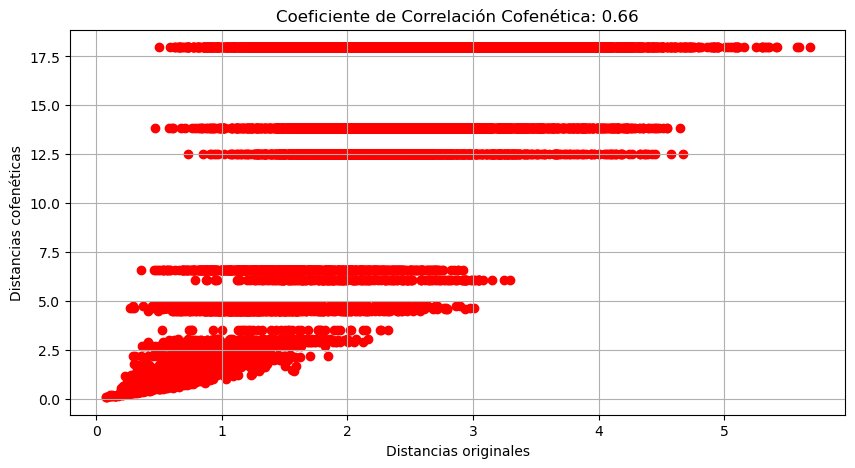

In [171]:
# Resultados

# Graficar las distancias originales y las distancias cofenéticas


plt.figure(figsize=(10, 5))
plt.scatter(original_distances, coph_dists, marker='o', color='red')
plt.xlabel('Distancias originales')
plt.ylabel('Distancias cofenéticas')
plt.title('Coeficiente de Correlación Cofenética: {:.2f}'.format(c))
plt.grid(True)
plt.show()

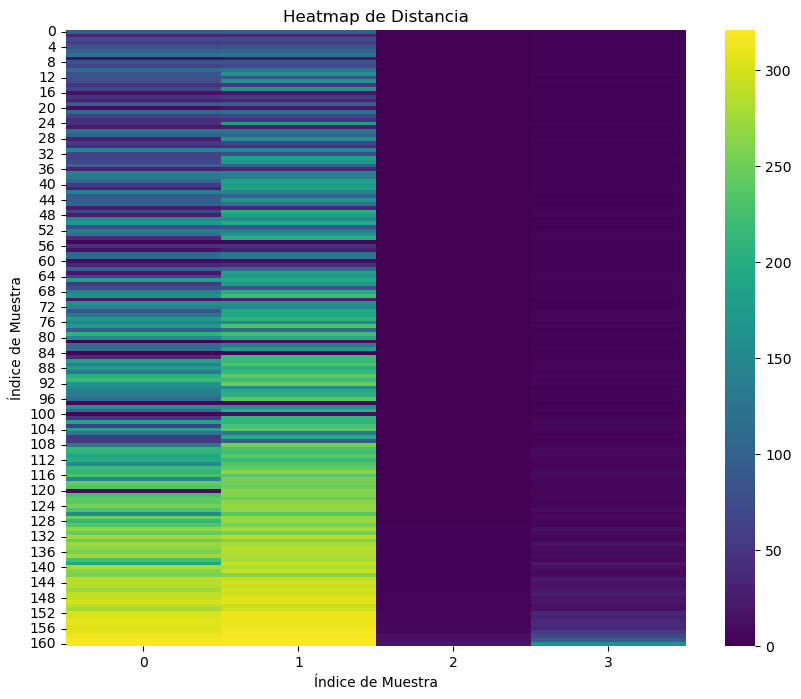

In [173]:
import seaborn as sns

# Calcular la matriz de distancia entre todas las muestras
distance_matrix = linkage(X, method='ward', metric='euclidean')

# Graficar el heatmap de la matriz de distancia
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap='viridis', annot=False)
plt.title('Heatmap de Distancia')
plt.xlabel('Índice de Muestra')
plt.ylabel('Índice de Muestra')
plt.show()



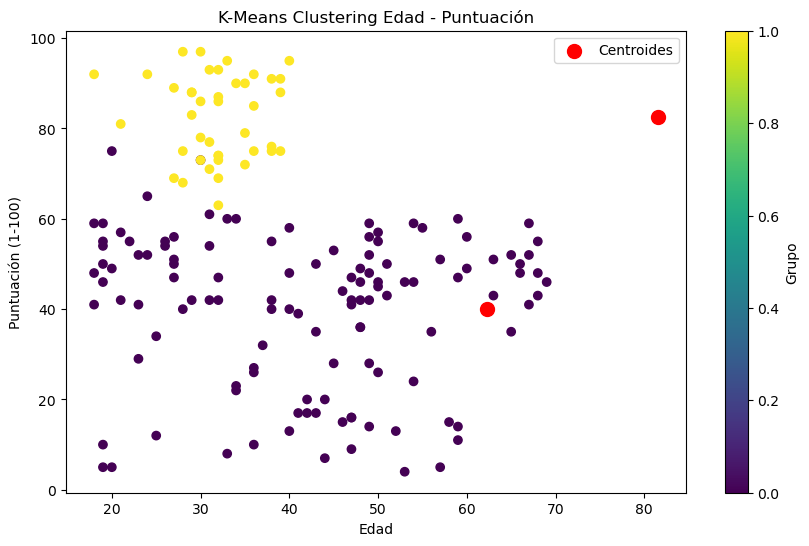

In [196]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Edad'], data['Puntuacion(1-100)'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=100, label='Centroides')
plt.xlabel('Edad')
plt.ylabel('Puntuación (1-100)')
plt.title('K-Means Clustering Edad - Puntuación')
plt.colorbar(label='Grupo')
plt.legend()
plt.show()

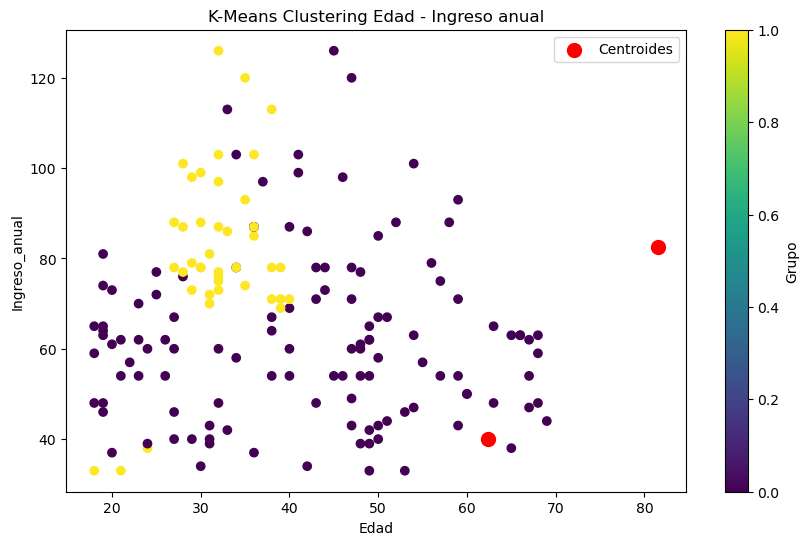

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Edad'], data['Ingreso_anual'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=100, label='Centroides')
plt.xlabel('Edad')
plt.ylabel('Ingreso_anual')
plt.title('K-Means Clustering Edad - Ingreso anual')
plt.colorbar(label='Grupo')
plt.legend()
plt.show()